# Quiero comprar una casa: Predecir precios de viviendas
**Contexto**: Estamos buscando comprar una vivienda por la zona de Ames, Iowa. Eres adicto a los chollos y quieres comprar a muy buen precio.

**Objetivo**: De alguna manera, ganar confianza sobre los precios de las viviendas para poder comprar al mejor precio.

**Metodología**: Crear un modelo de regresión para predecir los precios de las viviendas.

**Datos**: Datos históricos de ventas de viviendas en la zona de Ames, Iowa. Ver `data_description.txt` para más contexto.

## Que tienes que hacer tu?
Como mínimo, seguir las instrucciones de este notebook y contestar a las preguntas para conseguir crear un modelo que cumple con el objetivo del proyecto. Las preguntas cubren los requisitos mínimos para poder crear un modelo, pero es recomendable ir un poco más allá para aprender más.

### Entregable: cómo hacerlo y qué incluir
Lo más sencillo es copiar este notebook y trabajar directamente dentro de ello. 

Antes de todo *no hay ninguna respuesta "correcta"*. Lo importante es tomar decisiones y razonar estas decisiones. Este razonamiento se debe basar en análisis de los datos y tu conocimiento del problema.

El contenido que incluyáis debería

1. Contestar a las preguntas
 * Código es parte de contestar a las preguntas
 * Es necesario incluir texto para contestar a preguntas (castellano o ingles)
 * Gráficos ayudan a explicar tus argumentos
2. Ser auto-explicativo
 * El código que genera un análisis debería estar cerca del texto de este análisis - escribe como si estuvieras contando un cuento
 * Lo más importante es explicar tu razonamiento en cada paso
 * El notebook se debería de poder ejecutar de arriba abajo
3. Ser *breve* - si algo no contribuye a contestar a las preguntas, por favor no incluirlo
 * A veces uno intenta hacer algo que no funciona - esto también ayuda a contestar la pregunta (para saber lo que NO funciona)
 * Si haces una algo que te parece muy interesante pero no ayuda mucho, podéis incluirlo en un fichero aparte


Es muy normal que como vas avanzando tus respuestas a preguntas anteriores pueden cambiar. Si has contestado algo y luego te has dado cuenta que no te guste tu respuesta - cámbialo! No hay problema. En realidad esto es un proceso cíclico, no lineal.

No hay requisitos de librerías / lenguajes pero es altamente recomendable usar Python y tirar principalmente de `Pandas` y `scikit-learn`.

#### Por qué lo hacemos asi?
Este formato es algo muy típico de las pruebas que hacen las empresas en procesos de selección, donde el objetivo es mostrar tus habilidades y como te acercas a problemas reales de data science. Intentamos replicar esto para que podéis ganar confianza al futuro si os enfrentéis a esto. 

### Estructura
El notebook se compone por varias secciones que reflejan los pasos típicos de la creación de un modelo. Iremos introduciendo estas secciones en diferentes semanas. Cada sección depende de lo que has hecho anteriormente.

Cada sección viene con las preguntas de la sección. Lo más normal para contestar a la pregunta seria

1. Empezar con la pregunta - dejando tus pensamientos iniciales
2. Código y texto que ayuda en desarrollar tu respuesta
3. Un comentario final que expone tu "respuesta" definitiva - un resumen de los comentarios anteriores

Nota que a veces la "pregunta" es más bien una instrucción. Aquí esperamos un un resultado final más que una respuesta en texto. Aún así, es importante incluir explicación de lo que estás haciendo!

Los datos se encuentran en `primer-ejercicio/data/house-price-data.csv`.

## Entender los datos
Lo más importante de cualquier problema de data science es entender los datos. Si no entiendes - no puedes crear un modelo que tenga sentido.

### Cargar los datos
Lo primero de todo es cargar los datos, asegurar que está todo bien y empezar a formar ideas sobre como se relacionan los datos con nuestro problema.

In [13]:
import pandas as pd
import plotnine as pn

1. Cargar los datos y imprimir las primeras 5 filas

In [14]:
house_data = pd.read_csv('./../data/house-price-data.csv', index_col=0)
house_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Se han cargado de forma correcta los datos? Cómo lo sabemos?

In [15]:
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [16]:
house_data.shape

(1460, 80)

In [17]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [18]:
house_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
house_data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

*Texto explicando nuestro razonamiento*

The data has been loaded correctly into the DataFrame for the most part. But there are a few things to consider:
- The DataFrame has the expected number of rows and columns with a couple of exceptions:
    - The column named 'Bedroom' in the documentation is named 'BedroomAbvGr' in the dataset.
    - The column named 'Kitchen' in the documentation is named 'KitchenAbvGr' in the dataset.
- There are some missing/null values in unexpected columns:
    - Feature 'LotFrontage' has 259 missing values where a number is expected. Missing value could possibly mean 0 (smallest number is 21).
    - Feature 'MasVnrType' has 872 missing data. Documentation specifies a 'None' value for the column, however there are 8 'NA' values.
    - Feature 'MasVnrArea' has 8 'NA' values (same rows which have 'NA' on feature 'MasVnrType'). There are also 5 values set (different than 0) when 'MasVnrType' is 'None'.
    - Feature 'Electrical' has a missing value, but documentation does not specify there can be an N/A value.
    - Feature 'BldgType' has values 'Duplx' and 'TwnhsI' in the documentation that appear respectively as 'Duplex' and 'Twnhs' in the datate. We will asume they are typos
- There are some rows with incoherent values:
    - Row with ID '949' has a 'NA' value in feature 'BsmtExposure', however it has values for the rest of the basement feature. The value for that columns should probably be 'No'
    - Row with ID' 333' has a 'NA' value in feature 'BsmtFinType2', however it has a value in feature 'BsmtFinSF2'. We could simply assume the value 'GLQ' since the row has that value in the variable 'BsmtFinType1'
    - Row with ID '524' has an earlier year in 'YrSold' than 'YearRemodAdd'. Might just mean this data was recorded some time after the house was sold,  

3. Tras una mirada inicial - ¿Qué parece que tenemos en nuestros datos?

- We have the records of houses that have been sold. Each one of the records have plenty of different features about the house, as well as the conditions of the sale.
- The dataset is well-structured and documented overall but there are a few exceptions to consider when processing it, as explained above.

### Analizar los datos
Para entender lo que tenemos en los datos, los tenemos que analizar. En realidad, este paso es el más importante de todos y puede durar horas, días o meses (la verdad es que en una empresa, nunca terminamos de analizar los datos). El conocimiento que ganamos aquí forma la base del razonamiento que usaremos para hacer decisiones en el futuro.

Aquí buscamos cosas como

1. El comportamiento de nuestros datos
2. Los problemas que podemos tener
3. Una impresión inicial de lo que podemos y de lo que no podemos hacer con estos datos
4. Las metodologías que seguramente vamos a usar

1. Cuantas filas de datos tenemos? Qué representa cada fila?

In [20]:
row_count = house_data.shape[0]
row_count

1460

- There are a total of 1460 rows in the dataset.
- Each one of the rows represent a house that has been sold in the state of Iowa (USA) between 2006 and 2010.

2. ¿Hay filas que no son relevantes para nuestro problema?

3. ¿Qué variables crees que van a ser las más importantes? ¿Cómo se comportan estos datos? ¿Qué variable será nuestro target?

- The most important variables in my opinion will be: LotArea, Neighborhood, OverallCond, OverallCual, YearRemodAdd
- These feature influence in great measure the price of the sale which will be our target
- Our target variable will be the 'SalePrice' variable

4. ¿Cuándo se construyeron las diferentes casas? Dibuja un gráfico para visualizarlo

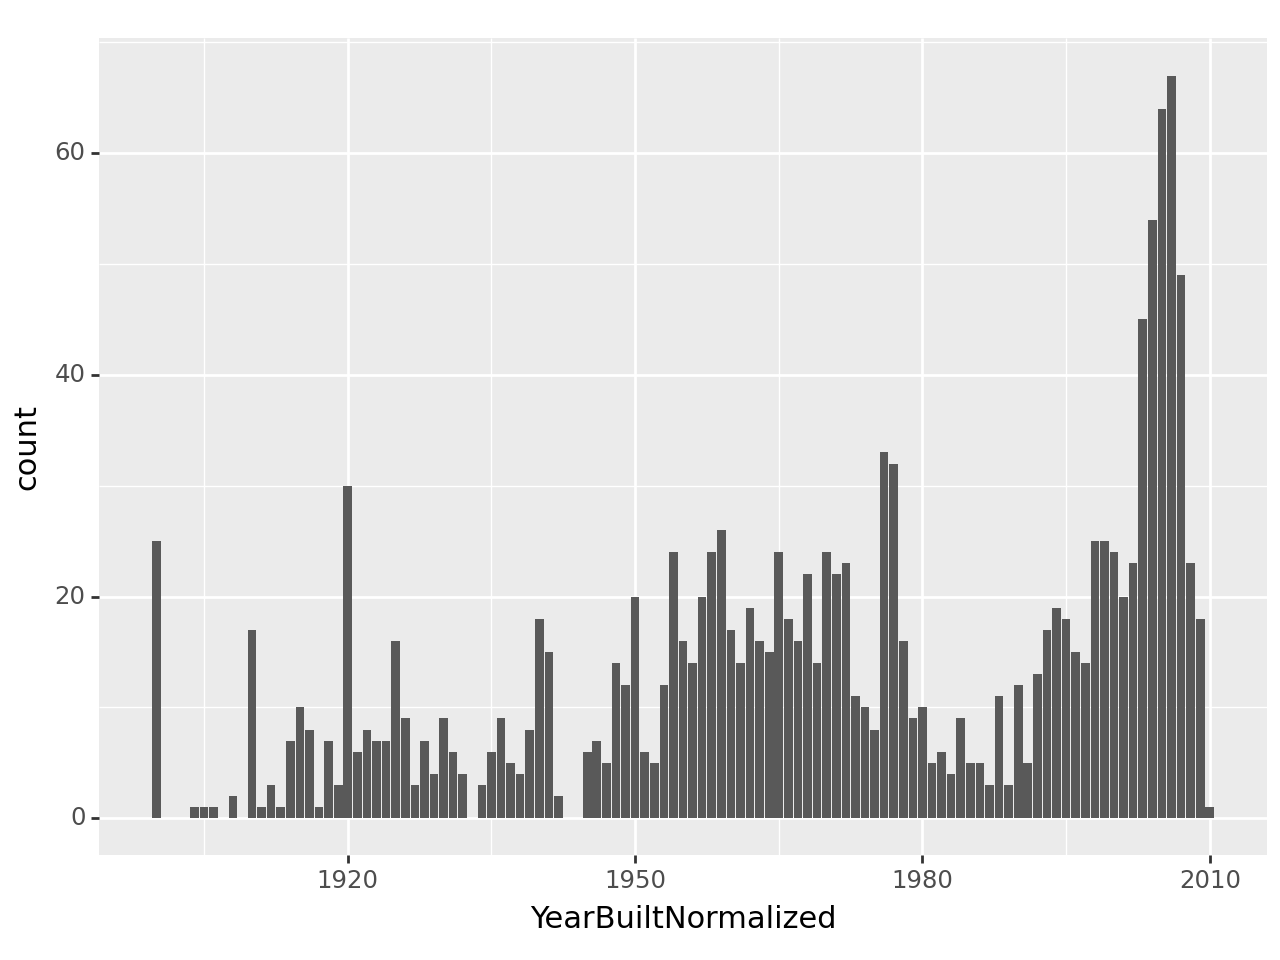

In [30]:
house_data['YearBuiltNormalized'] = house_data['YearBuilt'].where(house_data['YearBuilt'] >= 1900, 1900)
plot = (
        pn.ggplot(house_data, pn.aes('YearBuiltNormalized')) +
        pn.geom_bar()
)
plot.draw()

- Most of the houses were built in the past 20 years. There is also a considerable amount of houses that were built in the 50s to 70s.

5. ¿Cuánto tiempo tardaron las diferentes casas en venderse? Dibuja un gráfico para visualizarlo

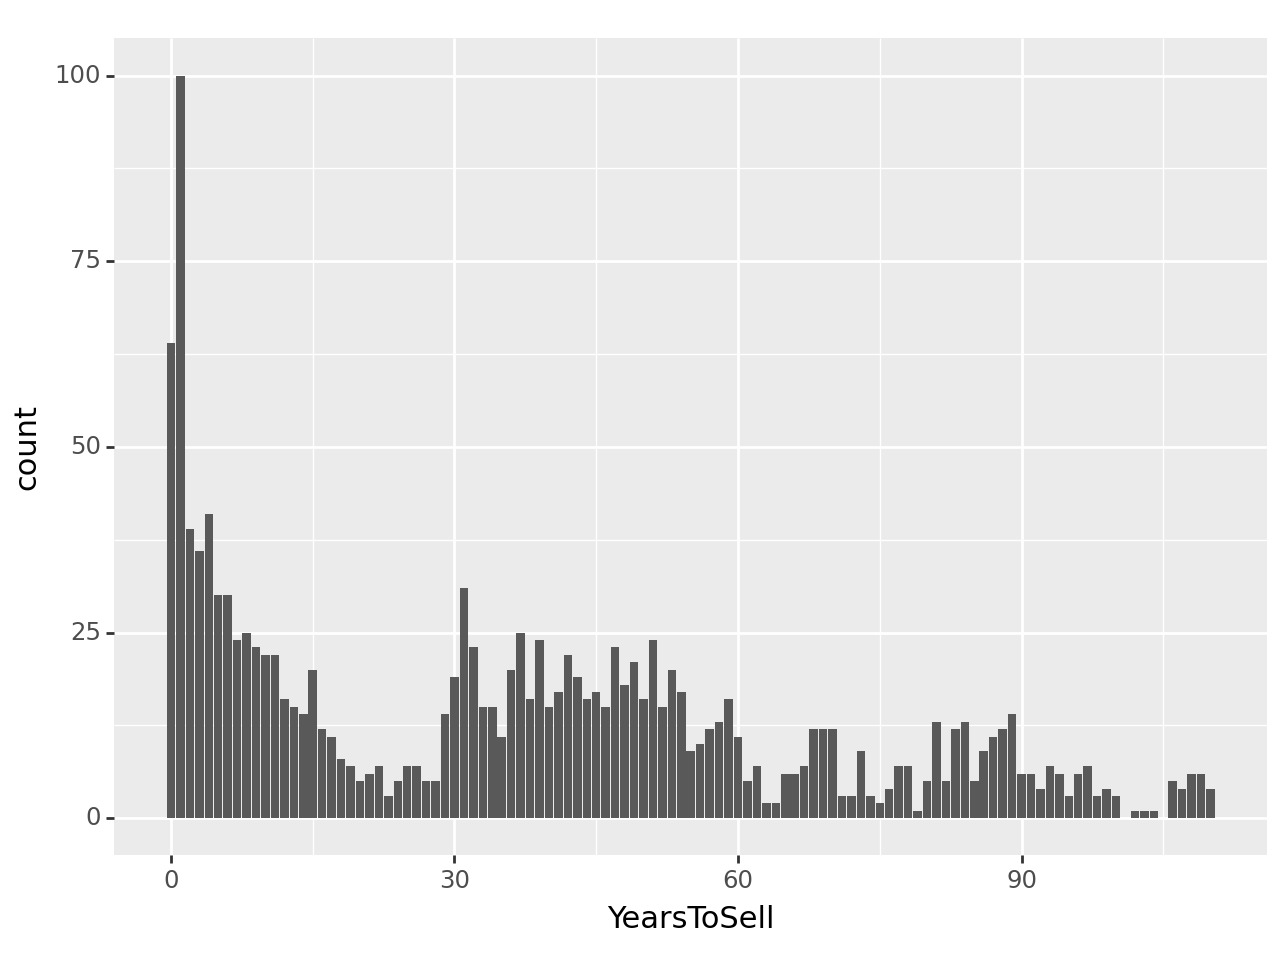

In [22]:
house_data["YearsToSell"] = house_data["YrSold"] - house_data["YearBuilt"]
plot = (
        pn.ggplot(house_data, pn.aes('YearsToSell')) +
        pn.geom_bar()
)
plot.draw()

- Most of the houses were sold in the first few years. Then there is a considerable group of houses which were sold between 30-55 years after being built.

### Limpiar los datos
Cuando creamos un modelo, no hay forma de "mágicamente" contar al modelo que es lo que queremos. Tenemos que usar unos datos que representan bien nuestro problema y crear un modelo que predice algo que alinea con la respuesta que buscamos.

Si los datos son "sucios" (malos, con problemas, reflejan algo que no representa bien a nuestro problema) - nuestro modelo va a predecir cosas que no acaban de tener mucho sentido, no son de fiar o directamente son equivocadas.

Cosas que queremos evitar

* Datos que no tienen que ver con nuestro problema
* Datos que tienen poca muestra
* Outliers
* Nulos

1. Identifique los principales problemas que tienen las variables que parecen (por ahora) más interesantes para el modelo

2. Arregla los problemas

3. Borra todos los datos que no son relevantes para el problema - simplifica los datos

## Preparación de los datos para el modelo
Ahora que entendemos bien los datos, tomamos un paso más directo hacia la creación de nuestro modelo preparando los datos para el entrenamiento.

### Relevancia de variables
Por norma general, queremos incluir variables que son importantes en la predicción de nuestro target:

* Tener menos variables más relevantes suele ser mejor - porque simplifica el modelo
* Si no tenemos variables relevantes, los resultados del modelo van a ser malos

Para analizar la relevancia, normalmente miramos que haya "correlaciones" entre diferentes variables y el target. Hay muchas formas de analizar estas "correlaciones", como por ejemplo:

* Coeficiente de correlación (variables continuas)
* La media del target para cada valor del variable (variables NO continuas)

1. Qué variables son los más relevantes? Analiza la relevancia para comprobarlo

2. Podemos crear algunas variables para mejorar la relevancia?

### Train y test
Dividir los datos en train y test (o train, test y validación) es un paso fundamental para la correcta evaluación de nuestro modelo. Buscamos replicar el efecto de "tener datos nuevos". 

Nota: En realidad, lo más correcto seria dividir en train / test ANTES de analizar relevancias - pero simplificamos un poco por ahora.

Nota 2: Si dividimos de forma *random* es importante fijar el seed (te vas a volver loco si no)

1. Qué variables quieres elegir para tu `X` final?

2. Divide los datos en train / test

## Modelado
Ahora vamos a entrenar el modelo. Si has hecho lo anterior bien, este paso es muy sencillo. Normalmente incluimos aquí optimizaciones del modelo, pero para el primer ejercicio esto es de menor importancia.

### Entrenar el modelo
La parta más sexy, pero por ahora lo más sencillo. Tiramos de librerías de modelos ya hechos para simplificarnos la vida.  

1. Crea un modelo de regresión

2. Generar predicciones para tu conjunto de test

### Evaluar el modelo
No vamos a dedicar mucho esfuerzo en este paso por ahora, pero es fundamental evaluar las predicciones que hemos generado. El objetivo es entender lo bueno que es nuestro modelo, para entender si podemos fiar de los resultados y usarlo para responder a nuestro problema.

1. Elige las métricas para tu evaluación

2. Evalúa las predicciones generadas

3. El modelo funciona? Se podría utilizar para ayudarnos con el problema que tenemos?